Часть 1 EDA
===========

Выбран dataset — 
предсказание оттока пользователей https://www.kaggle.com/blastchar/telco-customer-churn


1.Data Observation
----------------

Файлы находятся в подкаталоге ".\1.EDA\1.DataObservation".

**Первый шаг: делаем анализ необработанных данных (raw dataset). Применяем методы фильтрации по описательным статистикам и диаграммам. В подкаталоге ".\1.EDA\1.DataObservation" PDF находятся файлы с таблицами и диаграммами.**

***

PDF файлы были получены с помощью приложения: Jamovi + plugin Rj, для выполнения скрипта получения кросс-таблицы был использован системный R в настройках Rj. 
Для этого в системном R (вне Jamovi) был установлен пакет `jmvconnect`,
<a href="https://jamovi.readthedocs.io/ar/latest/usermanual/um_6_jamovi_and_R.html"  target="_blank">как описано в статье</a>
```
install.packages('jmvconnect')
```
**Устанавливать и применять Jamovi не требуется, потому что все результаты сохранены из Jamovi в виде PDF файлов.**
    
***

Сразу удалили колонку с идентификаторами.

### Категориальные и бинарные переменные

В файле ".\1.EDA\1.DataObservation\categoricals.pdf" содержатся описательные статистики по категориальным переменным.

#### Целевая колонка Churn

В файле ".\1.EDA\1.DataObservation\categoricals.pdf" первой идет таблица по целевой колонке. 
Выборка не вполне сбалансированная: No / Yes ~ 74 / 26 %.

#### Пропущенные значения

В экспорте PDF вся таблица Descriptives, Missing не поместилась, но в приложении Jamovi таблица (рабочий файл для Jamovi ".\1.EDA\1.DataObservation\WA_Fn-UseC_-Telco-Customer-Churn-DataObservation.omv") видна вся 
— пропусков в категориальных переменных нет.

#### Константные значения

На удаление feature: PhoneService — почти константа.

#### Доп.проверки

Чтобы убедиться в наличии связи колонки Partner с целевой Churn построили кросс-таблицу (по диаграмме была не очень чётко ясна зависимость). Значение вероятности случайности оказалось почти равным нулю (по хи-квадрат), следовательно зависимость есть. Кросс-таблица находится в конце файла byClasses.pdf.

### Числовые переменные
В файле ".\1.EDA\1.DataObservation\numericals.pdf" содержатся описательные статистики по числовым переменным.

#### Пропущенные значения

Пропущенные значения есть только у: TotalCharges — таких записей ≈ 0.16 %, поэтому записи с пропущенными значениями можем просто удалить.

#### Распределения

По графикам видно, что распределения числовых переменных не являются нормальными, поэтому корреляцию Пирсона мы применять не можем.

У колонки TotalCharges большое значение дисперсии и приличный сдвиг среднего относительно медианы, но сортировка колонки не выявила выбросов — просто диапазон значений большой и распределение имеет большую вытянутость.

В ".\1.EDA\1.DataObservation\numericals diagrams 2.pdf" мы видим, что выбросов нет.

### Статистики и диаграммы по классам

Таблицы и диаграммы по классам содержатся в файле byClasses.pdf

#### Класс Yes

Мы видим по диаграммам, что для позитивного класса Yes заметно отличаются пропорции по следующим features:
Partner, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, tenure, MonthlyCharges.
Интуитивно по диаграммам можно сделать предварительные выводы:
- представители класса Yes пользуются быстрым подключением к интернет через оптику;
- меньше пользуются не интернет аналогами сервисов (TV и т.п.);
- больше платят в месяц за услуги.
  
#### Класс No
Класс No в большинстве, поэтому мало отличается от общей выборки.

In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on

2.Feature engineering
-------------------

**Файлы данного этапа обработки помещены в подкаталог ".\1.EDA\2.Feature engineering".**

### Удаляем features
- customerID — уникальный идентификатор
- PhoneService - почти константа

### Оставляем features

По которым хорошо визуально по диаграммам и описательным статистикам выделяется позитивный класс:
Partner, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, tenure, MonthlyCharges.

### Обработка строк

Не потребовалась, потому что колонка с пропусками не вошла в результирующий набор features на данном этапе.

### Корреляция

Применять корелляцию Пирсона для числовых features нельзя, потому что распределение не нормальное. 
Сначала сделаем Feature Encoding. После этого применим корреляцию Спирмэна или Кендалла для анализа.

### Кодируем features

- Как бинарные: Partner, PaperlessBilling, Churn.
- Как порядковые: InternetService (чем быстрее канал связи, тем лучше), Contract.
- One Hot Encoding: OnlineSecurity, OnlineBackup,DeviceProtection, TechSupport,StreamingTV,StreamingMovies, PaymentMethod.


In [3]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder


# Select colums
columns = [
    'Partner', 'tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn'
]

# loading the data
data = pd.read_csv(r'.\0.Dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv',
                   usecols=columns)

# Encode as Binary

le = LabelEncoder()
data['Partner'] = le.fit_transform(data['Partner'])
data['PaperlessBilling'] = le.fit_transform(data['PaperlessBilling'])
data['Churn'] = le.fit_transform(
    data['Churn'].apply(lambda x: '1' if x == 'Yes' else '0')
)

# Encode as Ordered

enc = OrdinalEncoder(categories=[['No', 'DSL', 'Fiber optic']])
data['InternetService'] = enc.fit_transform(data[['InternetService']])

enc = OrdinalEncoder(categories=[["Month-to-month", "One year", "Two year"]])
data['Contract'] = enc.fit_transform(data[['Contract']])

# One Hot Encoding

features_for_encoding = (
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaymentMethod'
)
enc = OneHotEncoder(drop='first', dtype=np.int_)
transformer = ColumnTransformer(transformers=[('',
                                               enc,
                                               features_for_encoding)],
                                # For avoid prefix befor names of columns
                                verbose_feature_names_out=False,
                                # to keep the rest of features
                                # with the same values
                                remainder='passthrough')
transformed = transformer.fit_transform(data)
data = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

# Save cleaned dataframe to the new csv file
data.to_csv(
    (
        r'.\1.EDA\2.Feature engineering'
        r'\WA_Fn-UseC_-Telco-Customer-Churn-cleaned.csv'
    ),
    index=False
)

data.head()

,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner,tenure,InternetService,Contract,PaperlessBilling,MonthlyCharges,Churn
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,29.85,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,34.0,1.0,1.0,0.0,56.95,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,53.85,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,45.0,1.0,1.0,0.0,42.30,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,2.0,0.0,1.0,70.70,1.0


### Очищенный файл

".\1.EDA\2.Feature engineering\WA_Fn-UseC_-Telco-Customer-Churn-cleaned.csv"

## 3.DataAnalysis Correlation
Используем метод фильтрации — изучаем Correlation Heatmap.

Построим Correlation Heatmap по Кендаллу.

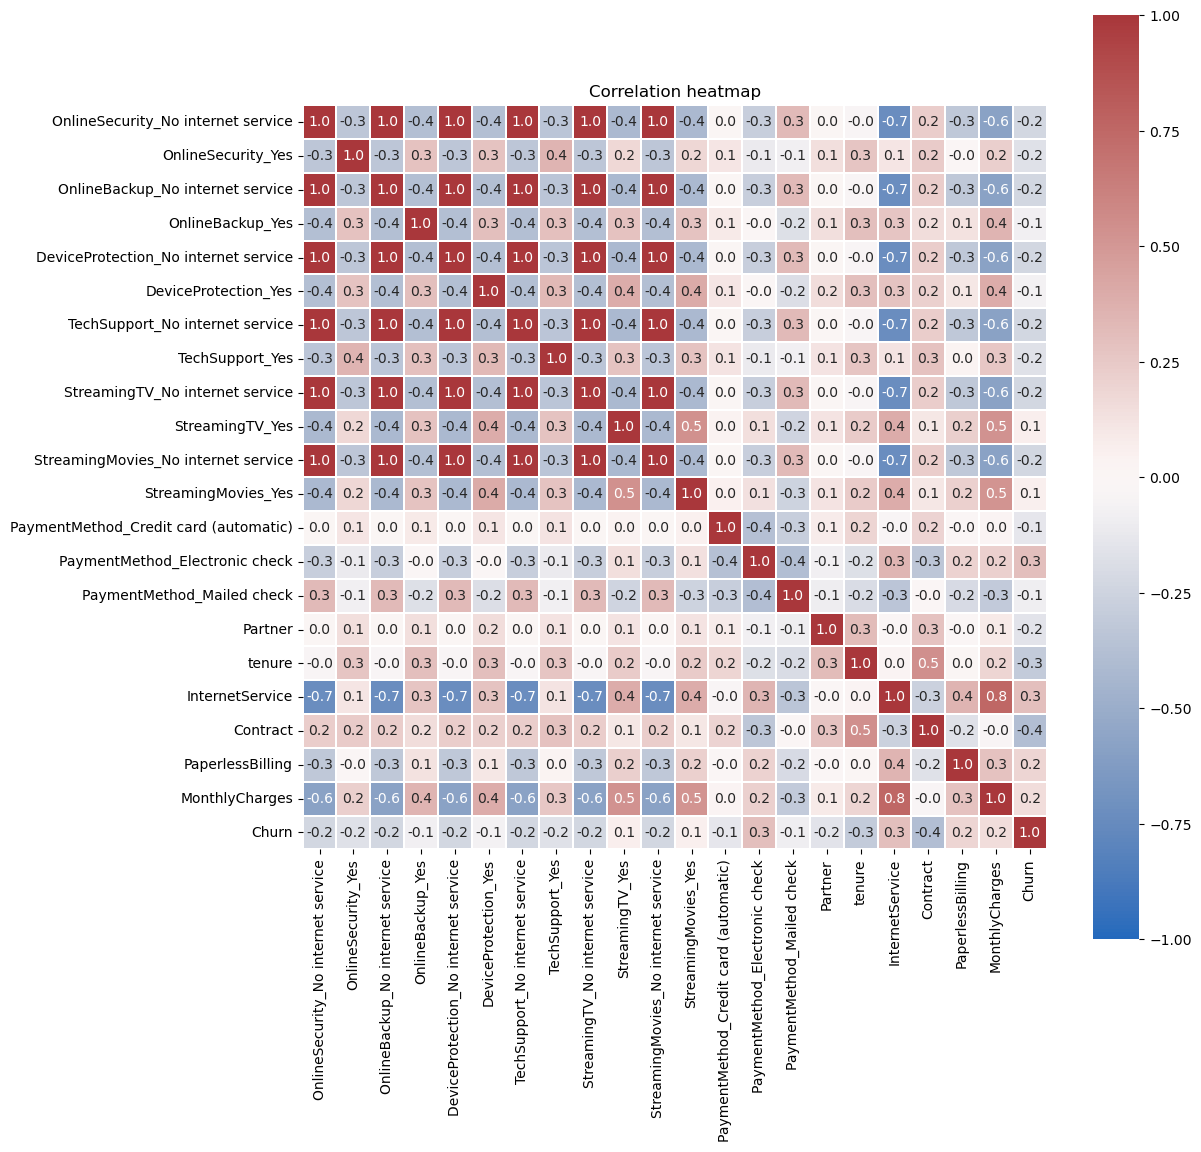

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(
    (
        r'.\1.EDA\2.Feature engineering'
        r'\WA_Fn-UseC_-Telco-Customer-Churn-cleaned.csv'
    )
)

plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(method='kendall'),
            square=True,
            annot=True,
            fmt=".1f",
            linewidths=0.1,
            cmap="vlag",
            vmin=-1,
            vmax=1)

plt.title('Correlation heatmap')
plt.savefig(r'.\1.EDA\3.DataAnalysis Correlation\correlationHeatmap.png',
            bbox_inches='tight')
plt.show()

Выводы 1:
1. В услугах есть избыточная информация: значения "No internet service" коррелируют с колонкой InternetService. Видимо, важны не виды услуг, а факт: используются ли онлайн услуги.
2. Колонки InternetService и MonthlyCharges коррелируют: это укрепляет написанное выше наблюдение, что представители позитивного класса больше платят за услуги.
3. С целевой колонкой прямо коррелируют колонки: Contract, tenure.
4. StreamingTV и StreamingMovies имеют совпадающий паттерн.

В дополнение, можно заметить, что PaymentMethod == "Electronic check" хорошо выделяет позитивный класс.

## 4.Feature engineering
- Удаляем колонки услуг: `OnlineSecurity_No internet service, OnlineBackup_No internet service DeviceProtection_No internet service TechSupport_No internet service StreamingTV*, StreamingMovies_No internet service
, InternetService` (из двух коррелирующих (описано выше в Выводы 1.2) оставляем числовую колонку, которая, очевидно, содержит больше информации (мы это видим по PCA анализу FeatureSelectionPCA.ipynb), а категориальную убираем).

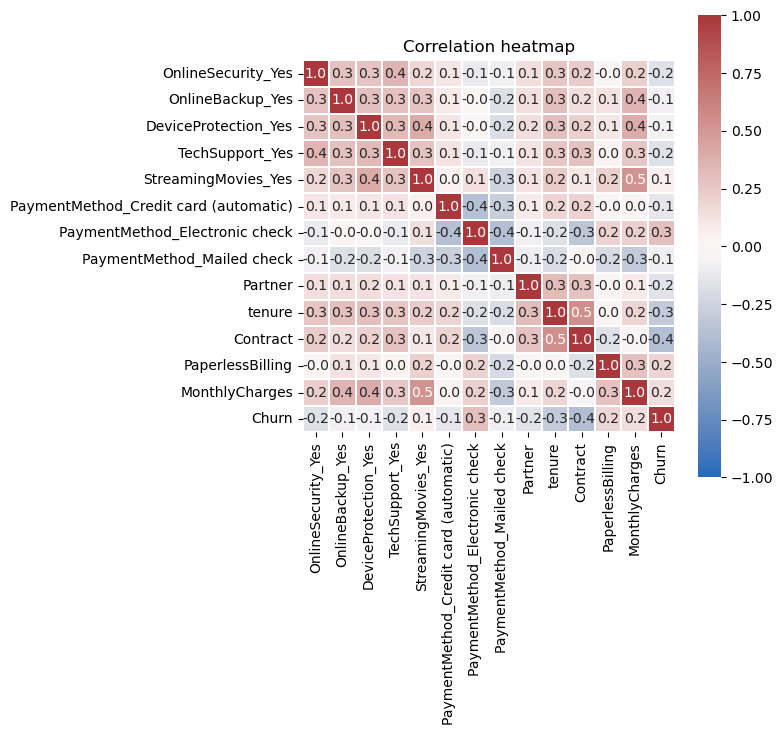

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(
    (
        r'.\1.EDA\2.Feature engineering'
        r'\WA_Fn-UseC_-Telco-Customer-Churn-cleaned.csv'
    )
)

data = data.drop(columns=['OnlineSecurity_No internet service',
                          'OnlineBackup_No internet service',
                          'DeviceProtection_No internet service',
                          'TechSupport_No internet service',
                          'StreamingTV_No internet service', 'StreamingTV_Yes',
                          'StreamingMovies_No internet service',
                          'InternetService'])

# Save cleaned dataframe to the new csv file
data.to_csv(
    (
        r'.\1.EDA\4.Feature engineering'
        r'\WA_Fn-UseC_-Telco-Customer-Churn-cleaned2.csv'
    ),
    index=False
)

# И еще раз проверим корреляцию

plt.figure(figsize=(6, 6))
sns.heatmap(data.corr(method='kendall'),
            square=True,
            annot=True,
            fmt=".1f",
            linewidths=0.1,
            cmap="vlag",
            vmin=-1,
            vmax=1)
plt.title('Correlation heatmap')
plt.savefig(r'.\1.EDA\4.Feature engineering\correlationHeatmap2.png',
            bbox_inches='tight')
plt.show()

Промежуточные результаты сохранены в файлы ".\1.EDA\4.Feature engineering\WA_Fn-UseC_-Telco-Customer-Churn-cleaned2.csv",
'.\1.EDA\4.Feature engineering\correlationHeatmap2.png'.

**Линейные корреляции устранены.**

## 5.FeatureSelection EmbeddingMethod
**Применим метод внедрения для получения дополнительной информации о полезности признаков для нашей задачи.**

### LogisticRegression

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

df = pd.read_csv(
    (
        r'.\1.EDA\4.Feature engineering'
        r'\WA_Fn-UseC_-Telco-Customer-Churn-cleaned2.csv'
    )
)

X_train, y_train = df.drop('Churn', axis=1), df['Churn']

model_log_lr1 = LogisticRegression(C=0.05,
                                   solver='liblinear',
                                   penalty='l1',
                                   random_state=1)
model_log_lr1.fit(X_train, y_train)

print("AUC-ROC на тренировочной выборке: {:.3f}".format(
    roc_auc_score(y_train, model_log_lr1.predict_proba(X_train)[:, 1])
))

print('Регрессионные коэффициенты')

for c, feature in zip(np.round(model_log_lr1.coef_, 3)[0], X_train.columns):
    print(feature, ':', c)

AUC-ROC на тренировочной выборке: 0.839
Регрессионные коэффициенты
OnlineSecurity_Yes : -0.398
OnlineBackup_Yes : -0.081
DeviceProtection_Yes : 0.0
TechSupport_Yes : -0.379
StreamingMovies_Yes : 0.029
PaymentMethod_Credit card (automatic) : 0.0
PaymentMethod_Electronic check : 0.352
PaymentMethod_Mailed check : -0.068
Partner : 0.0
tenure : -0.034
Contract : -0.745
PaperlessBilling : 0.295
MonthlyCharges : 0.025


### Decision Tree

AUC-ROC на тренировочной выборке: 0.783
OnlineSecurity_Yes : 0.000
OnlineBackup_Yes : 0.000
DeviceProtection_Yes : 0.000
TechSupport_Yes : 0.000
StreamingMovies_Yes : 0.000
PaymentMethod_Credit card (automatic) : 0.000
PaymentMethod_Electronic check : 0.000
PaymentMethod_Mailed check : 0.000
Partner : 0.000
tenure : 0.000
Contract : 0.792
PaperlessBilling : 0.000
MonthlyCharges : 0.208


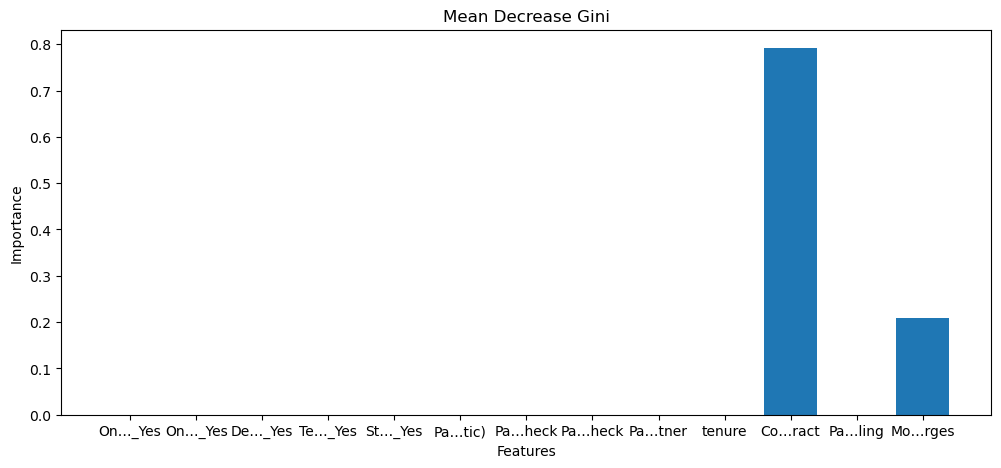

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

target = 'Churn'

df = pd.read_csv(
    (
        r'.\1.EDA\4.Feature engineering'
        r'\WA_Fn-UseC_-Telco-Customer-Churn-cleaned2.csv'
    )
)

X_train, y_train = df.drop(target, axis=1), df[target]

model_decision_tree = DecisionTreeClassifier(random_state=1, max_depth=2)
model_decision_tree.fit(X_train, y_train)

importance = model_decision_tree.feature_importances_
features = X_train.columns

print("AUC-ROC на тренировочной выборке: {:.3f}".format(
        roc_auc_score(y_train,
                      model_decision_tree.predict_proba(X_train)[:, 1])
))

# summarize feature importance
for name, v in zip(features, importance):
    print('%s : %.3f' % (name, v))

# plot feature importance
plt.figure(figsize=(12, 5))
plt.title('Mean Decrease Gini')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(
    range(len(importance)),
    importance,
    tick_label=list(
        map(
            lambda s: len(s) > 6 and s[:2] + '…' + s[len(s) - 4:] or s,
            features
        )
    )
)

plt.savefig(r".\1.EDA\5.FeatureSelection EmbeddingMethod\meanDecreaseGini.png",
            dpi=150)
plt.show()

### Выводы

С помощью метода внедрения мы получили, что наиболее важны для работы моделей следующие признаки:
"PaymentMethod_Electronic check", TechSupport_Yes, OnlineSecurity_Yes, MonthlyCharges, Contract.
Для моделей могут быть проигнорированы признаки:
"PaymentMethod_Credit card (automatic)", Partner, StreamingTV_Yes, DeviceProtection_Yes.

**Удаляем из набора данных колонки: "PaymentMethod_Credit card (automatic)", Partner, DeviceProtection_Yes.**

In [5]:
import pandas as pd

data = pd.read_csv(
    (
        r'.\1.EDA\4.Feature engineering'
        r'\WA_Fn-UseC_-Telco-Customer-Churn-cleaned2.csv'
    )
)

data = data.drop(columns=['PaymentMethod_Credit card (automatic)',
                          'Partner',
                          'DeviceProtection_Yes'])

# Save cleaned dataframe to the new csv file
data.to_csv(
    (
        r'.\1.EDA\6.ResultsPreparedDataSet'
        r'\WA_Fn-UseC_-Telco-Customer-Churn-prepared.csv'
    ),
    index=False
)

## Результат

**Подготовленный для обучения моделей набор данных содержится в файле**

'.\1.EDA\6.ResultsPreparedDataSet\WA_Fn-UseC_-Telco-Customer-Churn-prepared.csv'

и содержит следующий набор признаков:
- "PaymentMethod_Electronic check" — dummy переменная, которая означает вид оплаты онлайн
- "PaymentMethod_Mailed check" — dummy переменная, которая означает вид оплаты офлайн
- tenure — число месяцев: сколько клиент остается в компании
- InternetService — упорядоченный признак: чем больше число, тем быстрее интернет канал
- Contract — упорядоченный признак, который указывает на срок контракта: чем больше число, тем дольше срок
- PaperlessBilling — признак примененеия безбумажного документооборота
- Churn — целевой бинарный признак: 1 Yes, 0 No.
